## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Checking the content of the data
#mouse_metadata.head()
#study_results.head()




In [55]:
print (f"Three Observations on this data analysis:")
print (f"1. The population of male and female specimen is almost equal. Male mice was about 50.4 % and female mice was about 49.6%")
print (f"2. Capomulin and Ramicane had the lowest mean tumor size. Coincidentally, these two drugs also have the highest number of mice tested")
print (f"3. Based on Pearson's r value, we calculated a correlation coefficient pf 0.84. This suggests a strong positive correlation between the mice's weight and the size of the tumor.")

Three Observations on this data analysis:
1. The population of male and female specimen is almost equal. Male mice was about 50.4 % and female mice was about 49.6%
2. Capomulin and Ramicane had the lowest mean tumor size. Coincidentally, these two drugs also have the highest number of mice tested
3. Based on Pearson's r value, we calculated a correlation coefficient pf 0.84. This suggests a strong positive correlation between the mice's weight and the size of the tumor.


In [2]:
# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
all_data = merged_data

# Display the data table for preview

all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
all_data.info()

mouse_number = all_data["Mouse ID"].value_counts()
mice = len(mouse_number)
mice

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_mouse=pd.DataFrame(duplicate_mice)
all_duplicated_mouse

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_all_data = all_data[all_data['Mouse ID'].isin(duplicate_mice)==False]

#all_data.count()

In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice=new_all_data["Mouse ID"].value_counts()
cleaned_new_mice=len(new_mice)
cleaned_new_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = new_all_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = new_all_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = new_all_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = new_all_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = new_all_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

# This method is the most straighforward, creating multiple series and putting them all together at the end.



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

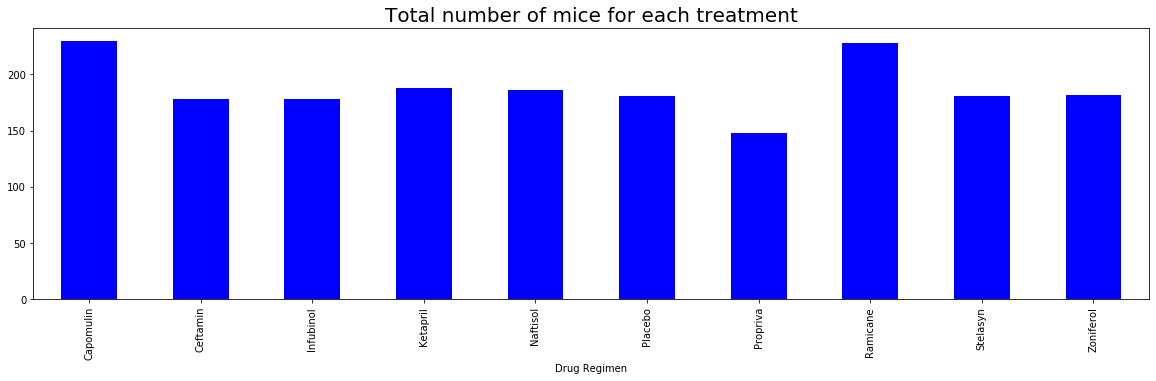

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_treatment= new_all_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

mouse_per_treatment.plot(kind="bar", stacked=True, color="b", figsize=(20,5))

# Set a title for the chart
plt.title("Total number of mice for each treatment", fontsize=20)

plt.show()
plt.tight_layout()

In [11]:
#List of drug regiment

reg_name = (new_all_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
reg_name

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

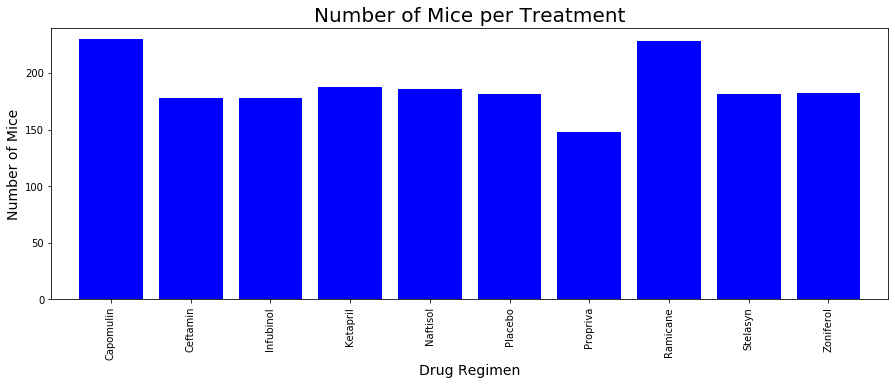

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mouse_per_treatment))
fig1, ax1 = plt.subplots(figsize=(15, 5))
plt.bar(x_axis, reg_name, color='b', alpha=1.0, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(reg_name)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

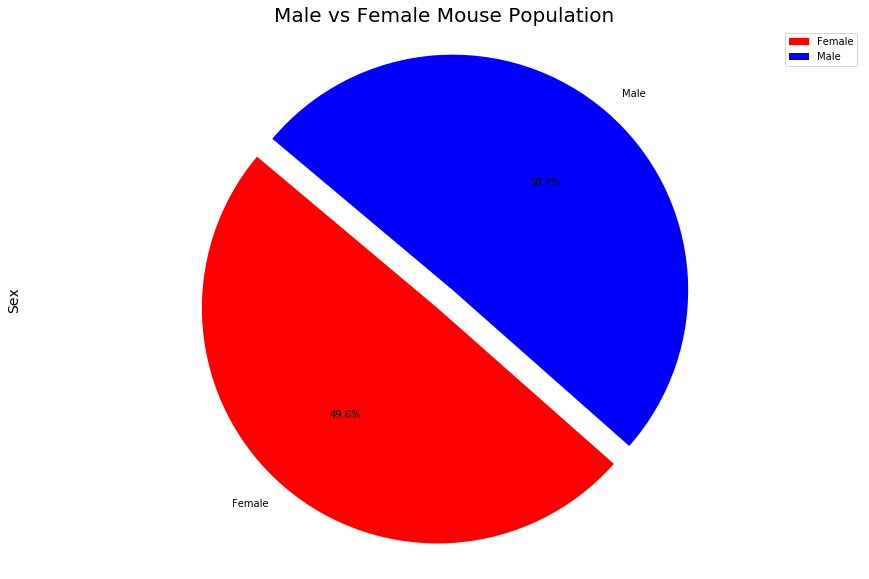

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#  Group by gender and get the number to plot
groupby_gender = new_all_data.groupby(["Mouse ID","Sex"])

gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender

colours = ['red', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colours, startangle=140, explode = explode, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.show()


(-1.1877265930885335,
 1.1112071628288431,
 -1.1963696973319076,
 1.1123740819715626)

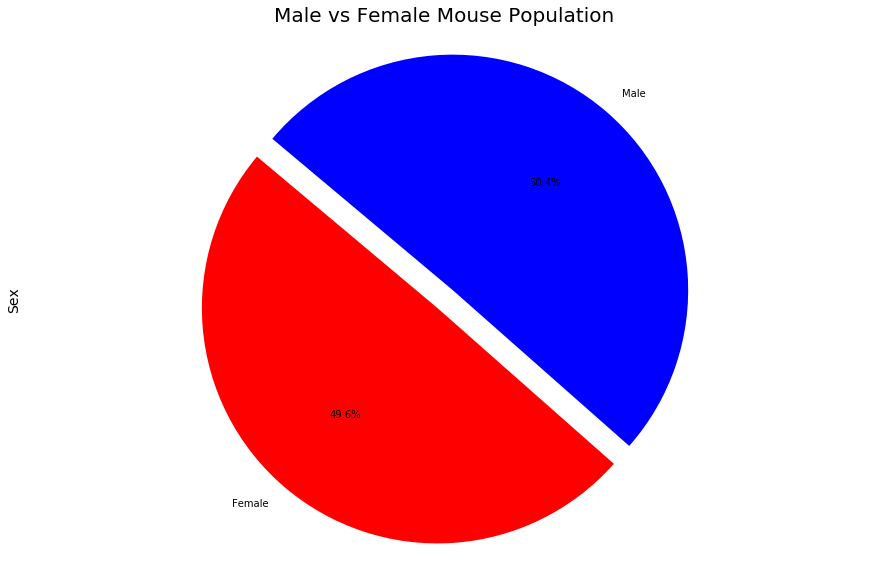

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.6,50.4]

#Set colors for each section of the pie
colors = ['red', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis
plt.axis("equal",fontsize = 14)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = new_all_data.loc[new_all_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = new_all_data.loc[new_all_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = new_all_data.loc[new_all_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = new_all_data.loc[new_all_data["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [16]:
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, new_all_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, new_all_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, new_all_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, new_all_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
   
# Create empty list to fill with tumor vol data (for plotting)

treatment_list = []

In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes 
Capomulin_tumor = Capomulin_merge["Tumor Volume (mm3)"]
    
    # add subset 
quartiles = Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [27]:
#Ramicane

# Locate the rows which contain mice on each drug and get the tumor volumes 
Ramicane_tumor = Ramicane_merge["Tumor Volume (mm3)"]
    
    # add subset 
quartiles = Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [30]:
#Ceftamin

# Locate the rows which contain mice on each drug and get the tumor volumes 
Ceftamin_tumor = Ceftamin_merge["Tumor Volume (mm3)"]
    
    # add subset 
quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

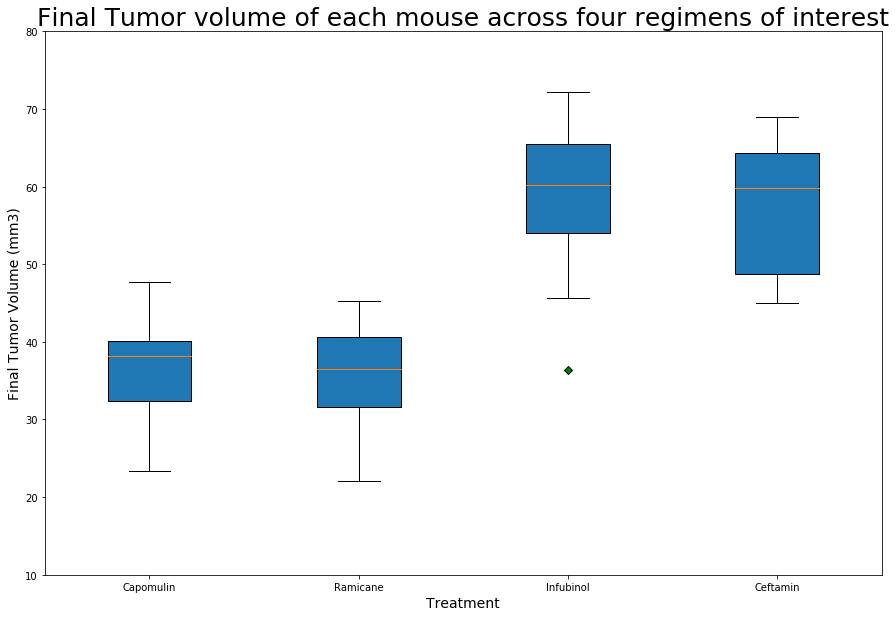

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dataplot = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumor volume of each mouse across four regimens of interest',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Treatment',fontsize = 14)
ax1.boxplot(dataplot, labels=treatment_names, widths = 0.4, patch_artist=True,vert=True, flierprops=green_diamond)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

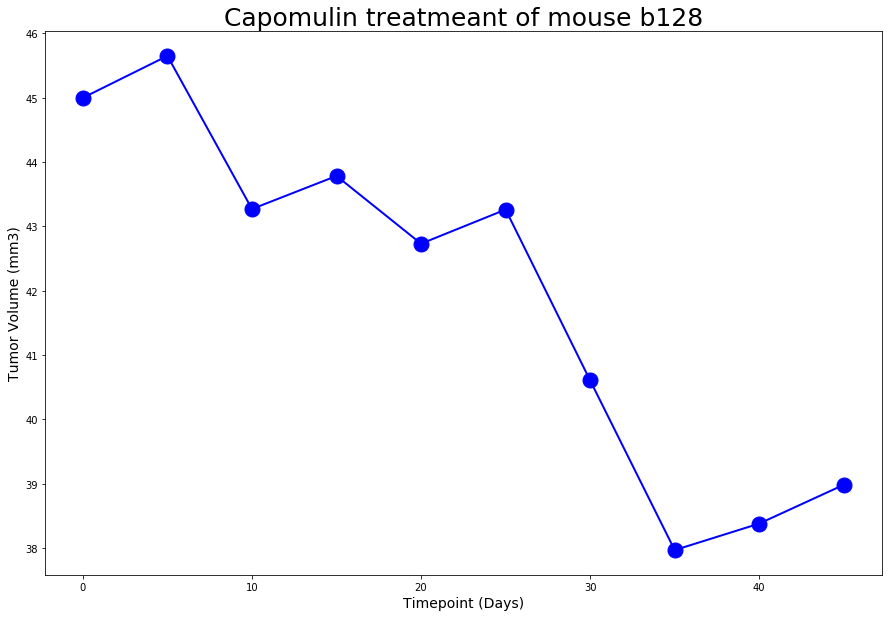

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
line_df.head()

x_axis = line_df["Timepoint"]
tumorsize = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b128',fontsize =25)
plt.plot(x_axis, tumorsize,linewidth=2, markersize=15,marker="o",color="blue")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

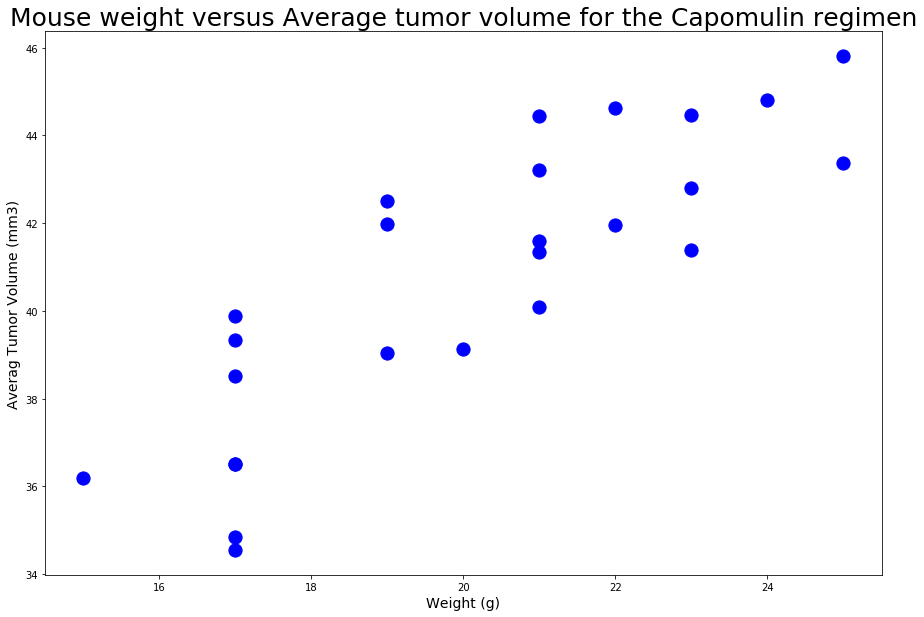

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))

scatterplot =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(scatterplot['Weight (g)'],scatterplot['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse weight versus Average tumor volume for the Capomulin regimen',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)

plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 

corr=st.pearsonr(scatterplot['Weight (g)'],scatterplot['Tumor Volume (mm3)'])[0]

print(f"The correlation coefficient is {corr}")


#linear regression


x = scatterplot['Weight (g)']
y = scatterplot['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = x * slope + intercept

line_eq = "y = " + str((round(slope,2))) + "x + " + str((round(intercept,2)))

print(line_eq)

# for mouse weight and average tumor volume for the Capomulin regimen



The correlation coefficient is 0.8419363424694717
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


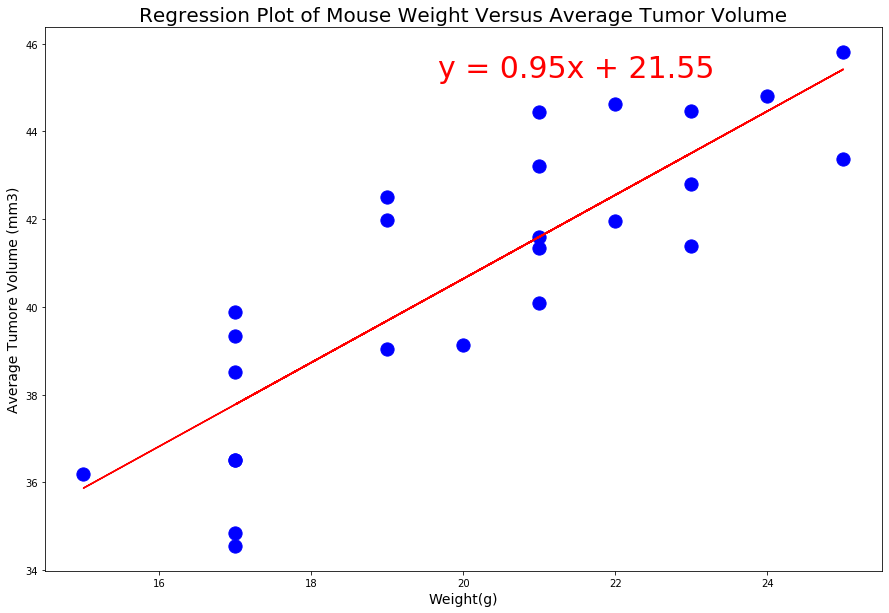

In [48]:

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x,y,s=175, color="blue")
plt.plot(x,regression,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()